In [28]:
import numpy as np
from planar_utils import load_planar_dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import sklearn 
import sklearn.datasets
import sklearn.linear_model

C:\Users\nq9093\AppData\Local\Temp\ipykernel_11852\4184251400.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=get_cmap('coolwarm', 2))


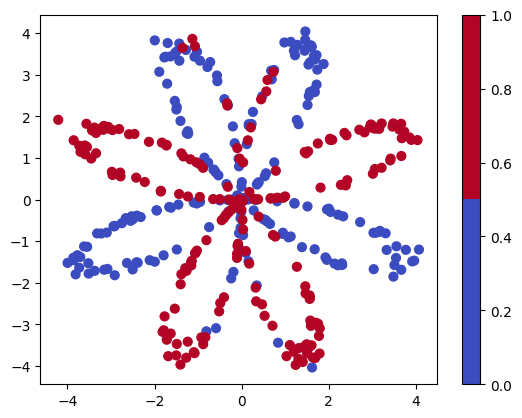

In [72]:
X, Y = load_planar_dataset()
X = X
Y = Y

plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=get_cmap('coolwarm', 2))
plt.colorbar()
plt.show()

c:\Users\nq9093\AppData\Local\anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nq9093\AppData\Local\Temp\ipykernel_11852\2709635602.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(xv, yv, c=Z, cmap=get_cmap("BrBG", 2), alpha=.1)
C:\Users\nq9093\AppData\Local\Temp\ipykernel_11852\2709635602.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=get_cmap('BrBG', 2))


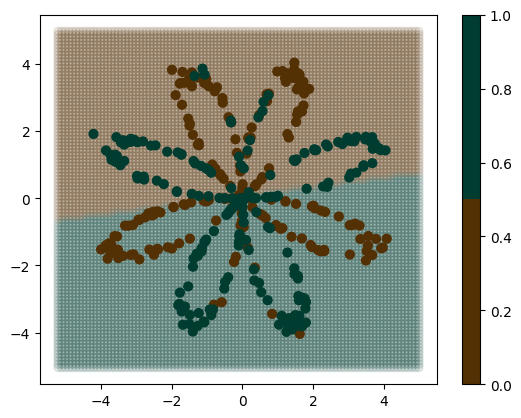

47.0

In [81]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

def plot_decision_boundary(X, Y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    xv = xx.flatten()
    yv = yy.flatten()
    grid = np.stack((xv, yv), axis=1)
    Z = clf.predict(grid)
    plt.scatter(xv, yv, c=Z, cmap=get_cmap("BrBG", 2), alpha=.1)
    plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=get_cmap('BrBG', 2))
    plt.colorbar()
    plt.show()

plot_decision_boundary(X, Y)

lr_predictions = clf.predict(X.T)
np.where(lr_predictions == Y[0, :])[0].shape[0] / Y.shape[1] * 100

In [92]:
n_x = X.shape[0]
n_h = 4
n_y = Y.shape[0]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = W1 @ X + b1
    A1 = np.tanh(Z1)
    Z2 = W2 @ A1 + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = -np.sum(np.multiply(Y, np.log(A2)) + np.multiply(1 - Y, np.log(1 - A2))) / m
    return cost

def backward_propagation(W1, b1, W2, b2, Z1, A1, Z2, A2, X, Y):
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = dZ2 @ A1.T / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = W2.T @ dZ2 * (1 - np.power(A1, 2))
    dW1 = dZ1 @ X.T / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

def nn_model(X, Y, n_h, num_iterations, learning_rate, print_cost=False):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    for i in range(num_iterations):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        cost = compute_cost(A2, Y)
        dW1, db1, dW2, db2 = backward_propagation(W1, b1, W2, b2, Z1, A1, Z2, A2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if i % 1000 == 0 and print_cost:
            print("Cost after iteration %i: %f" % (i, cost))
    return W1, b1, W2, b2

def predict(W1, b1, W2, b2, X):
    Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
    predictions = (A2 > 0.5)
    return predictions


In [93]:
W1, b1, W2, b2 = nn_model(X, Y, n_h, 100000, 1.02, True)

Cost after iteration 0: 0.693143
Cost after iteration 1000: 0.284418
Cost after iteration 2000: 0.271830
Cost after iteration 3000: 0.264744
Cost after iteration 4000: 0.259946
Cost after iteration 5000: 0.256533
Cost after iteration 6000: 0.254013
Cost after iteration 7000: 0.252092
Cost after iteration 8000: 0.250587
Cost after iteration 9000: 0.249380
Cost after iteration 10000: 0.248394
Cost after iteration 11000: 0.247574
Cost after iteration 12000: 0.246882
Cost after iteration 13000: 0.246290
Cost after iteration 14000: 0.245777
Cost after iteration 15000: 0.245329
Cost after iteration 16000: 0.244933
Cost after iteration 17000: 0.244579
Cost after iteration 18000: 0.244261
Cost after iteration 19000: 0.243972
Cost after iteration 20000: 0.243709
Cost after iteration 21000: 0.243468
Cost after iteration 22000: 0.243245
Cost after iteration 23000: 0.243038
Cost after iteration 24000: 0.242845
Cost after iteration 25000: 0.242665
Cost after iteration 26000: 0.242496
Cost after ite

C:\Users\nq9093\AppData\Local\Temp\ipykernel_11852\1999544489.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(xv, yv, c=Z, cmap=get_cmap("BrBG", 2), alpha=.1)
C:\Users\nq9093\AppData\Local\Temp\ipykernel_11852\1999544489.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=get_cmap('BrBG', 2))


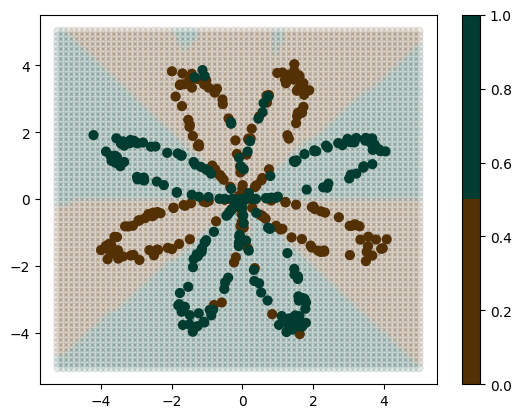

In [100]:
def plot_decision_boundary_nn(X, Y, W1, b1, W2, b2):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.15
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    xv = xx.flatten()
    yv = yy.flatten()
    grid = np.stack((xv, yv), axis=1)
    Z = predict(W1, b1, W2, b2, grid.T)
    plt.scatter(xv, yv, c=Z, cmap=get_cmap("BrBG", 2), alpha=.1)
    plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=get_cmap('BrBG', 2))
    plt.colorbar()
    # plt.show()

plot_decision_boundary_nn(X, Y, W1, b1, W2, b2)

C:\Users\nq9093\AppData\Local\Temp\ipykernel_11852\1999544489.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(xv, yv, c=Z, cmap=get_cmap("BrBG", 2), alpha=.1)
C:\Users\nq9093\AppData\Local\Temp\ipykernel_11852\1999544489.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=get_cmap('BrBG', 2))


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 67.25 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 90.5 %
Accuracy for 6 hidden units: 91.25 %
Accuracy for 7 hidden units: 89.5 %
Accuracy for 8 hidden units: 90.25 %
Accuracy for 9 hidden units: 90.75 %
Accuracy for 10 hidden units: 91.25 %
Accuracy for 20 hidden units: 91.25 %
Accuracy for 50 hidden units: 90.75 %
Accuracy for 100 hidden units: 90.25 %


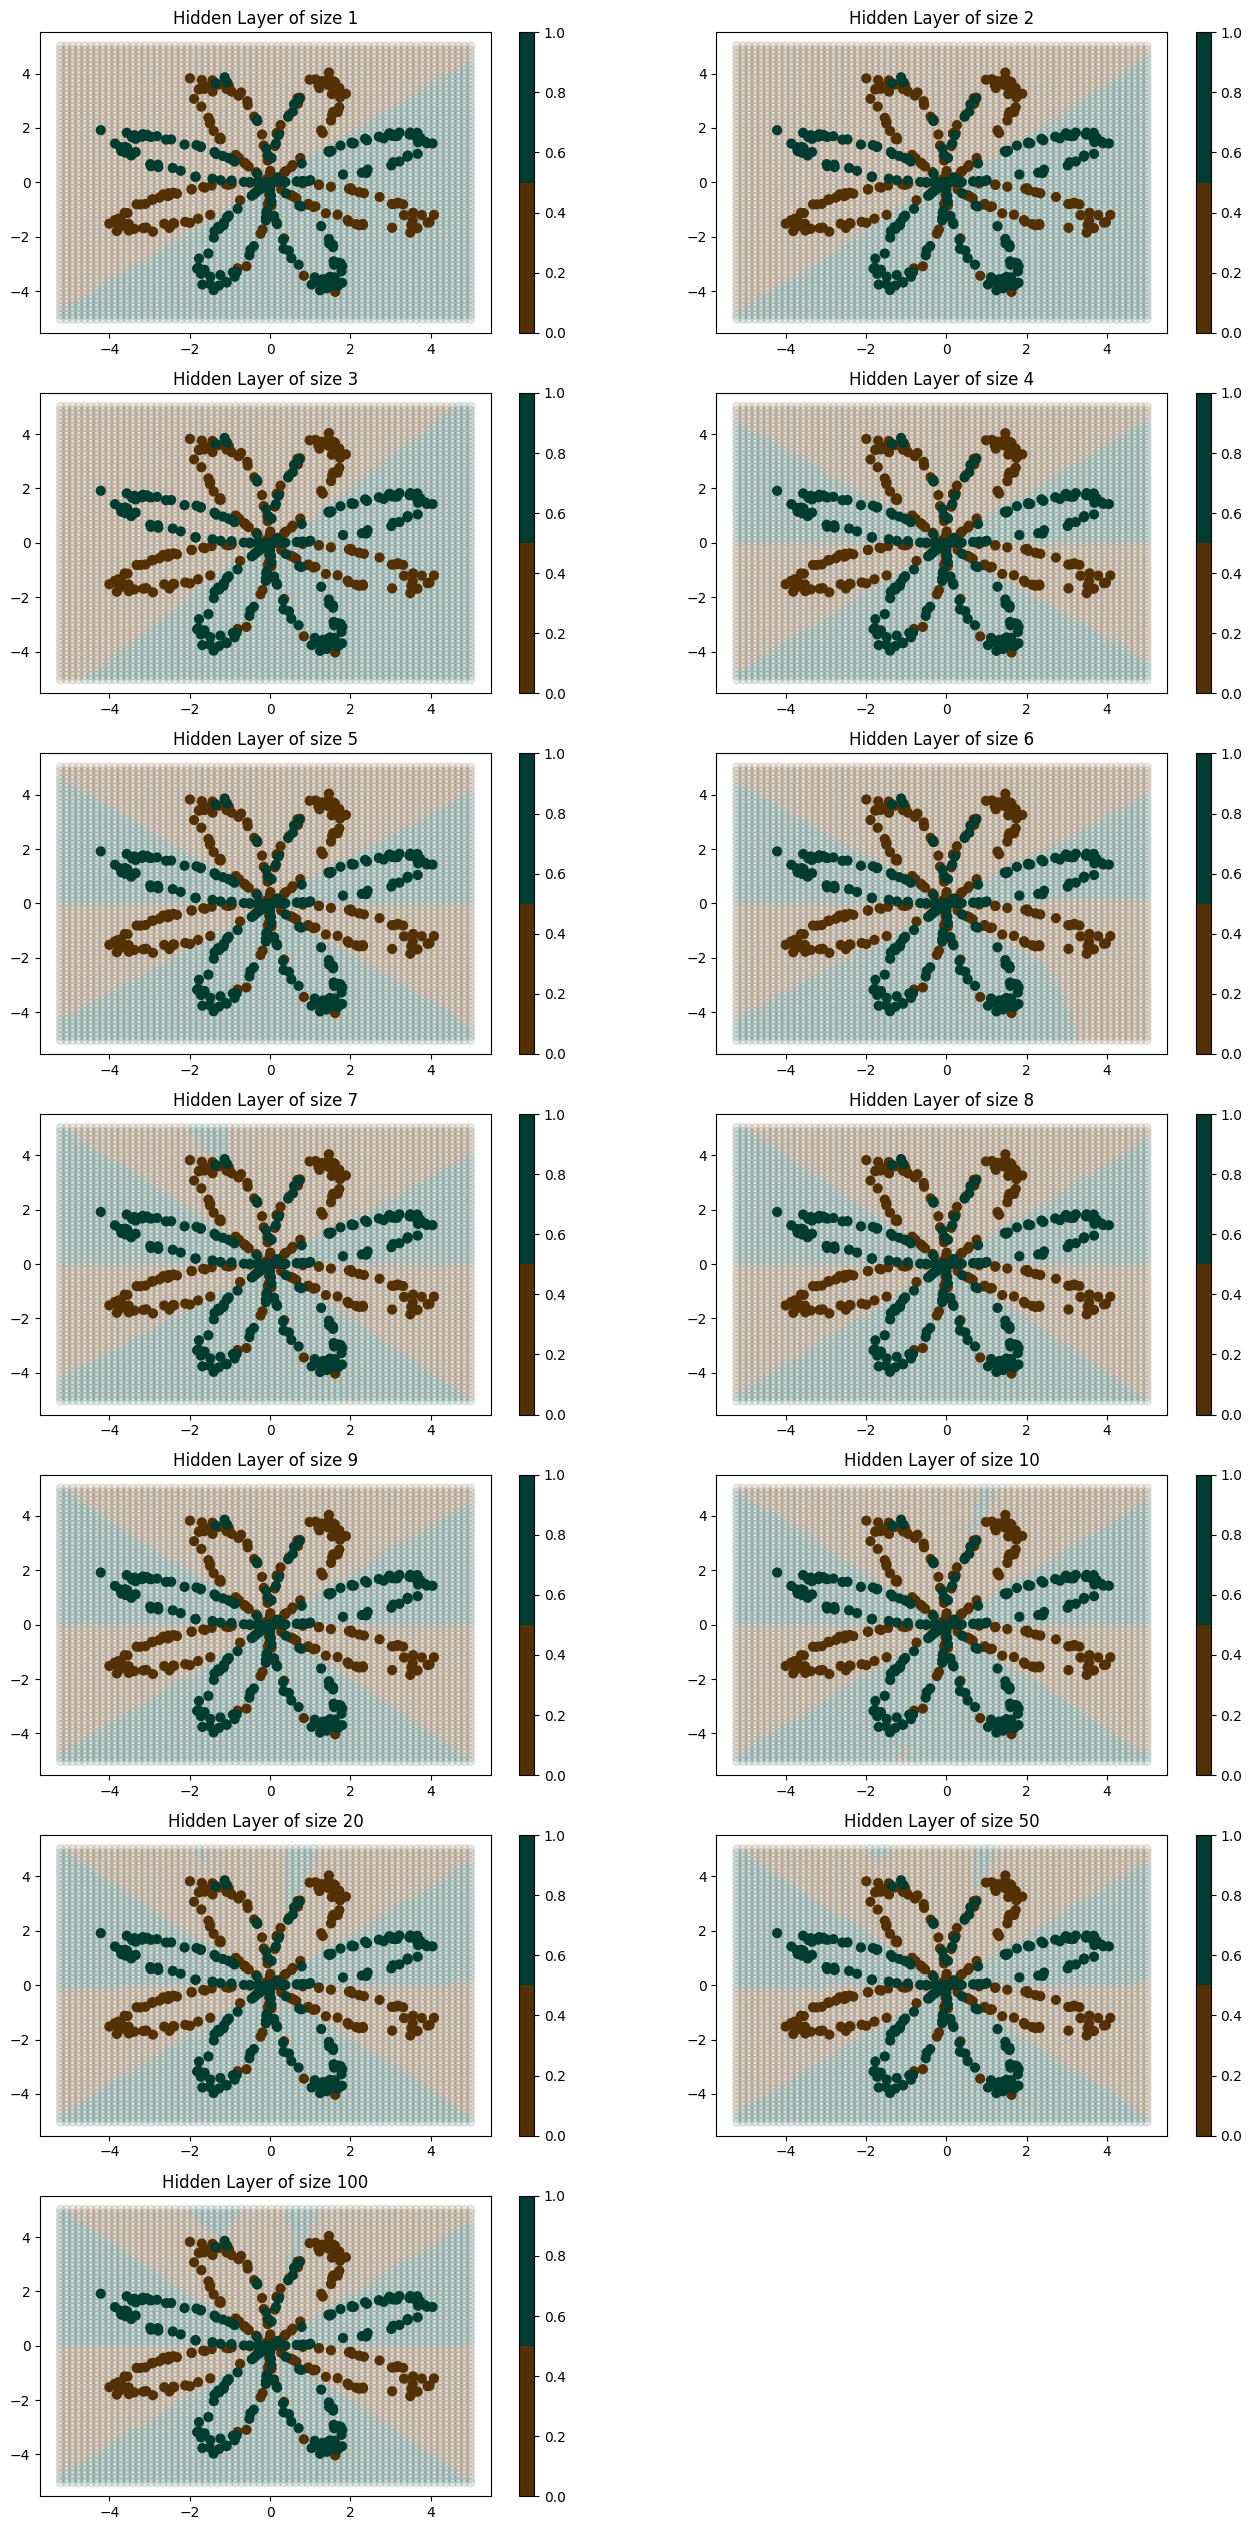

In [103]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(7, 2, i + 1)
    plt.title("Hidden Layer of size %d" % n_h)
    W1, b1, W2, b2 = nn_model(X, Y, n_h, 5000, 1.2)
    plot_decision_boundary_nn(X, Y, W1, b1, W2, b2)
    predictions = predict(W1, b1, W2, b2, X)
    accuracy = np.where(predictions == Y)[0].shape[0] / Y.shape[1] * 100
    print("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

In [106]:
import numpy as np
from planar_utils import load_extra_datasets

noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "noisy_moons"

In [120]:
def plot_decision_boundary_nn(X, Y, W1, b1, W2, b2):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.15
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    xv = xx.flatten()
    yv = yy.flatten()
    grid = np.stack((xv, yv), axis=1)
    Z = predict(W1, b1, W2, b2, grid.T)
    plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=get_cmap("BrBG", 2), alpha=.5)
    plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=get_cmap('BrBG', 2), alpha=.1)
    plt.colorbar()

Accuracy: 99.6 %


C:\Users\nq9093\AppData\Local\Temp\ipykernel_11852\2304840488.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=get_cmap("BrBG", 2), alpha=.5)
C:\Users\nq9093\AppData\Local\Temp\ipykernel_11852\2304840488.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=get_cmap('BrBG', 2), alpha=.1)


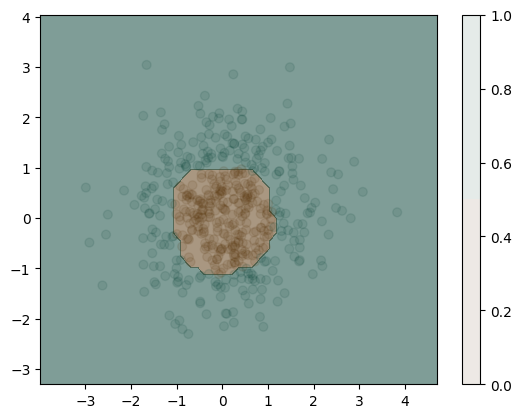

In [161]:
dataset = sklearn.datasets.make_gaussian_quantiles(n_samples=500, n_features=2, n_classes=2)
X, Y = dataset
X = X.T
Y = Y.reshape(1, Y.shape[0])

W1, b1, W2, b2 = nn_model(X, Y, 10, 10000, 1.02, False)
plot_decision_boundary_nn(X, Y, W1, b1, W2, b2)
predictions = predict(W1, b1, W2, b2, X)
accuracy = np.where(predictions == Y)[0].shape[0] / Y.shape[1] * 100
print("Accuracy: {} %".format(accuracy))